# Regression Loss

# Linear Regression with Outliers

In [1]:
import numpy as np
import pandas as pd
import random as random
import matplotlib.pyplot as plt
import torch

x shape is:  (100, 1)
y shape is:  (100, 1)


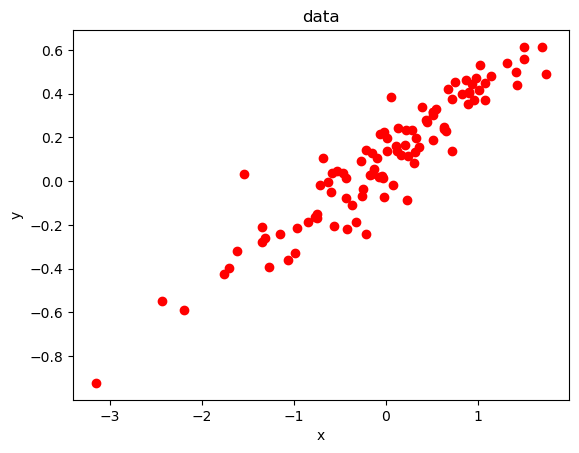

In [3]:
N = 100
theta0 = 0.1
theta1 = 0.3

x = np.random.normal(0.0, 1, N).reshape(-1, 1)
y = theta0 + theta1 * x
y = y + np.random.normal(0.0, 0.1, N).reshape(-1, 1)

print('x shape is: ', x.shape)
print('y shape is: ', y.shape)

plt.figure()
plt.plot(x, y, 'ro')
plt.title('data')
plt.xlabel('x'), plt.ylabel('y')
plt.show()

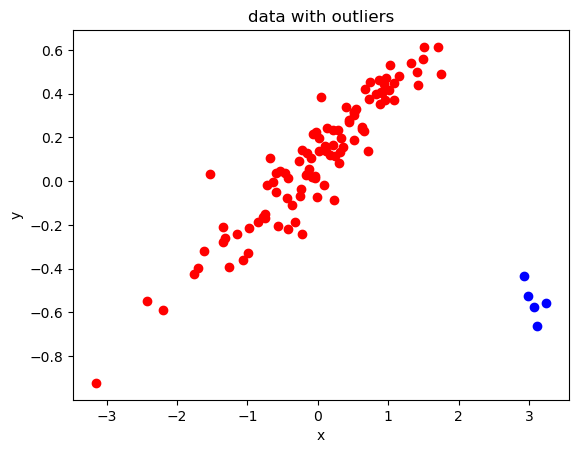

In [4]:
x_out = np.random.normal(3, 0.1, 5)
y_out = np.random.normal(-0.5, 0.1, 5)

x_outlier = np.vstack([x, x_out.reshape(-1,1)])
y_outlier = np.vstack([y, y_out.reshape(-1,1)])

# x_outlier = np.vstack([x, np.array([1, 2]).reshape(-1,1)])
# y_outlier = np.vstack([y, np.array([-0.8, -0.8]).reshape(-1,1)])
A_outlier = np.hstack([x_outlier**0, x_outlier])
A_outlier = np.asmatrix(A_outlier)

plt.figure()
plt.plot(x, y, 'ro')
plt.plot(x_out, y_out, 'bo')
plt.title('data with outliers')
plt.xlabel('x'), plt.ylabel('y')
plt.show()

### L2 Norm

In [5]:
class find_theta:
    def __init__(self, x, y, n_iter = 100):
        self.x = x
        self.y = y
        self.t0 = torch.tensor(np.random.randn(1), dtype=float, requires_grad=True)
        self.t1 = torch.tensor(np.random.randn(1), dtype=float, requires_grad=True)
        self.step_size = 0.001
        self.optimizer = torch.optim.SGD([self.t1, self.t0], lr=self.step_size)
        self.n_iter = 100
        self.theta_history = []

    def loss(self):
        return ((self.y - (self.t1 * self.x + self.t0)) ** 2).sum()

    def optimize(self):
        for t in range(0, self.n_iter):
            # Calculate loss
            loss = self.loss()

            # Calculate gradient
            loss.backward()

            # This is how the optimizer actually works (theta0 and 1 are updated)
            self.optimizer.step()
            self.optimizer.zero_grad()

            # Save Log
            self.theta_history.append([self.t0.item(), self.t1.item()])
            if (t % 10 == 0):
                print('iter= {},\t t0: {:3f},\t t1: {:3f},\t loss: {:3f}'.format(t, self.t0.item(), self.t1.item(), loss.item()))
        self.theta_history = np.array(self.theta_history)
        return loss.item()

In [6]:
n_iter = 100
step_size = 0.001

x_outlier_tensor = torch.tensor(x_outlier).float()
y_outlier_tensor = torch.tensor(y_outlier).float()

model = find_theta(x_outlier_tensor, y_outlier_tensor, n_iter=n_iter)
model.optimize()

t0 = model.t0
t1 = model.t1

iter= 0,	 t0: 0.475348,	 t1: -0.145947,	 loss: 47.184775
iter= 10,	 t0: 0.103551,	 t1: 0.095139,	 loss: 9.158388
iter= 20,	 t0: 0.060209,	 t1: 0.117337,	 loss: 8.704005
iter= 30,	 t0: 0.055312,	 t1: 0.119621,	 loss: 8.698418
iter= 40,	 t0: 0.054765,	 t1: 0.119867,	 loss: 8.698349
iter= 50,	 t0: 0.054704,	 t1: 0.119894,	 loss: 8.698348
iter= 60,	 t0: 0.054697,	 t1: 0.119897,	 loss: 8.698348
iter= 70,	 t0: 0.054696,	 t1: 0.119898,	 loss: 8.698348
iter= 80,	 t0: 0.054696,	 t1: 0.119898,	 loss: 8.698348
iter= 90,	 t0: 0.054696,	 t1: 0.119898,	 loss: 8.698348


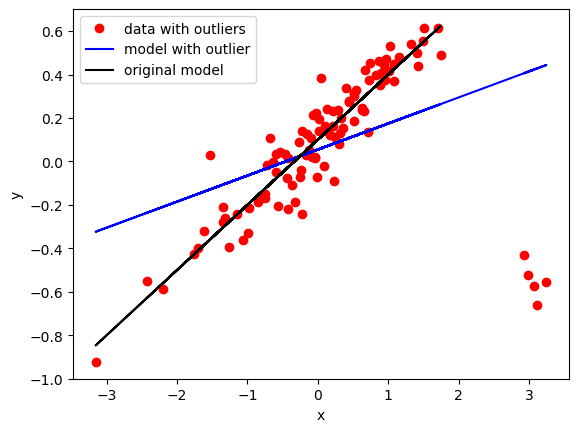

In [8]:
plt.figure()
plt.plot(x_outlier, y_outlier, 'ro')
plt.plot(x_outlier, (t1.detach().numpy()*x_outlier + t0.detach().numpy()),'b')
plt.plot(x, theta1*x + theta0,'k')
plt.xlabel('x'), plt.ylabel('y')
plt.legend(['data with outliers', 'model with outlier', 'original model'])
plt.show()

### L1 Norm

In [9]:
class find_theta_l1(find_theta):
    def loss(self):
        return (torch.abs(self.y - (self.t1 * self.x + self.t0))).sum()

iter= 0,	 t0: 0.453496,	 t1: -2.198065,	 loss: 214.516959
iter= 10,	 t0: 0.409496,	 t1: -1.348515,	 loss: 142.103953
iter= 20,	 t0: 0.305496,	 t1: -0.511817,	 loss: 70.748479
iter= 30,	 t0: 0.125496,	 t1: 0.102338,	 loss: 23.937496
iter= 40,	 t0: 0.105496,	 t1: 0.286248,	 loss: 15.531347
iter= 50,	 t0: 0.105496,	 t1: 0.287426,	 loss: 15.530432
iter= 60,	 t0: 0.105496,	 t1: 0.288603,	 loss: 15.529517
iter= 70,	 t0: 0.103496,	 t1: 0.289173,	 loss: 15.528823
iter= 80,	 t0: 0.103496,	 t1: 0.289427,	 loss: 15.528732
iter= 90,	 t0: 0.103496,	 t1: 0.289681,	 loss: 15.528642


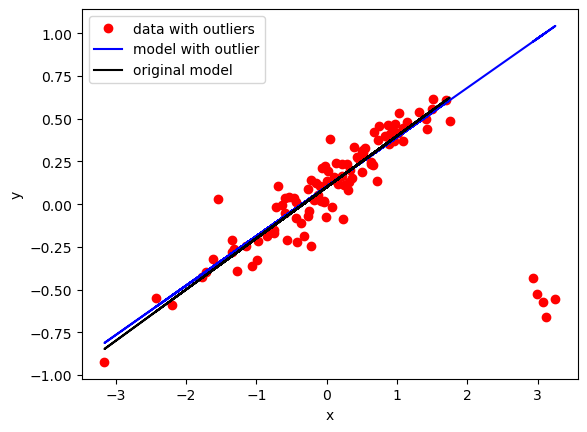

In [11]:
model = find_theta_l1(x_outlier_tensor, y_outlier_tensor, n_iter=n_iter)
model.optimize()

theta_history = model.theta_history
t0 = model.t0
t1 = model.t1

plt.figure()
plt.plot(x_outlier, y_outlier, 'ro')
plt.plot(x_outlier, (t1.detach().numpy()*x_outlier + t0.detach().numpy()),'b')
plt.plot(x, theta1*x + theta0,'k')
plt.xlabel('x'), plt.ylabel('y')
plt.legend(['data with outliers', 'model with outlier', 'original model'])
plt.show()

# Bias-Variance Analysis

In [12]:
# -*- coding: utf-8 -*-
import numpy as np
from sklearn.datasets import fetch_california_housing, load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

# -----------------------------------------------------------
# 공통: Bias–Variance 분해 (회귀, 제곱오차 기준)
#  - bootstrap으로 학습셋을 바꿔가며 예측 분포 확보
#  - bias^2 = (y - 예측평균)^2 평균
#  - variance = 예측의 분산 평균
#  - mse = ((y - 예측)^2) 평균
# -----------------------------------------------------------
def bias_variance_decomp(regressor, X_train, y_train, X_test, y_test,
                         n_rounds=80, random_state=42):
    rng = np.random.RandomState(random_state)
    preds = []
    for r in range(n_rounds):
        # 부트스트랩 리샘플
        idx = rng.randint(0, X_train.shape[0], size=X_train.shape[0])
        X_res, y_res = X_train[idx], y_train[idx]
        model = regressor
        model.fit(X_res, y_res)
        preds.append(model.predict(X_test))
    preds = np.array(preds)  # (n_rounds, n_test)
    avg_pred = preds.mean(axis=0)
    bias2 = np.mean((y_test - avg_pred) ** 2)
    variance = np.mean(preds.var(axis=0))
    mse = np.mean((y_test - preds) ** 2)
    return bias2, variance, mse

def report(tag, bias2, var, mse):
    print(f"[{tag}]  Bias^2={bias2:.4f} | Var={var:.4f} | MSE={mse:.4f}")



(20640, 8)
(20640,)
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


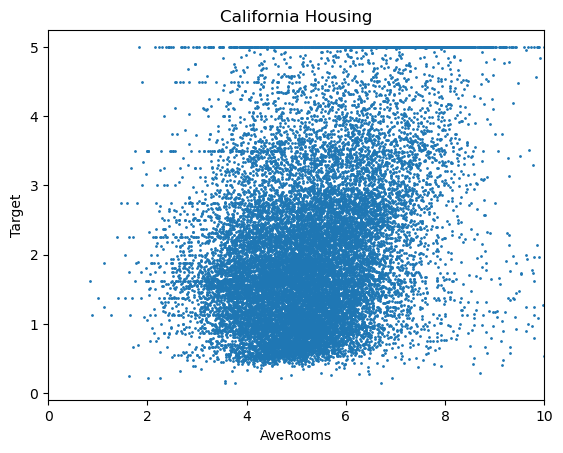

In [13]:
# 1) California Housing (Bias↑ 케이스)
# ===========================================================
# 1) Bias가 큰 경우: 비선형 데이터(make_friedman1) + 선형모델
#    - LinearRegression: underfitting → Bias↑
#    - 개선1) PolynomialFeatures로 복잡도↑
#    - 개선2) RandomForest로 비선형성 학습
# ===========================================================

cal = fetch_california_housing()
Xc, yc = cal.data, cal.target
Xc_tr, Xc_te, yc_tr, yc_te = train_test_split(Xc, yc, test_size=0.3, random_state=0)

print(Xc.shape)
print(yc.shape)
print(cal.feature_names)

idx = 2
plt.figure()
plt.scatter(Xc[:, idx], yc, s=1)
plt.xlabel(cal.feature_names[idx])
plt.ylabel("Target")
plt.title("California Housing")
plt.xlim([0, 10])
plt.show()

In [14]:
dt = make_pipeline(StandardScaler(), DecisionTreeRegressor(random_state=0, max_depth=2, min_samples_leaf=3, max_leaf_nodes=3))
b2, v, e = bias_variance_decomp(dt, Xc_tr, yc_tr, Xc_te, yc_te)
report("CaliforniaHousing - DecisionTree (Bias↑)", b2, v, e) # Large Bias

# Increasing Model Complexity
dt = make_pipeline(StandardScaler(), DecisionTreeRegressor(random_state=0, max_depth=8, min_samples_leaf=10))
b2, v, e = bias_variance_decomp(dt, Xc_tr, yc_tr, Xc_te, yc_te)
report("CaliforniaHousing - RandomForest (Bias↓)", b2, v, e)


[CaliforniaHousing - DecisionTree (Bias↑)]  Bias^2=0.7977 | Var=0.0403 | MSE=0.8380
[CaliforniaHousing - RandomForest (Bias↓)]  Bias^2=0.3519 | Var=0.1068 | MSE=0.4588


(442, 10)
(442,)
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


Text(0.5, 1.0, 'Diabetes')

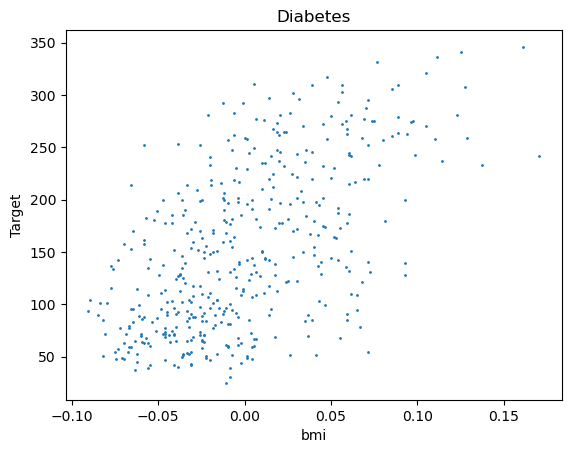

In [15]:
# 2) Diabetes (Variance↑ 케이스)
# ===========================================================
# 2) Variance가 큰 경우: 표본이 작고 잡음 영향 큰 diabetes
#    - 과적합 트리: Variance↑
#    - 개선1) 트리 가지치기(max_depth)로 규제↑
#    - 개선2) RandomForest(배깅)로 분산↓
#    - 개선3) Ridge로 편향 조금 늘리고 분산 크게↓ (안정화)
# ===========================================================

dia = load_diabetes()
Xd, yd = dia.data, dia.target
Xd_tr, Xd_te, yd_tr, yd_te = train_test_split(Xd, yd, test_size=0.3, random_state=0)

print(Xd.shape)
print(yd.shape)
print(dia.feature_names)

idx = 2
plt.figure()
plt.scatter(Xd[:, idx], yd, s=1)
plt.xlabel(dia.feature_names[idx])
plt.ylabel("Target")
plt.title("Diabetes")

In [16]:
dt = DecisionTreeRegressor(random_state=0)  # 무제한 트리
b2, v, e = bias_variance_decomp(dt, Xd_tr, yd_tr, Xd_te, yd_te)
report("Diabetes - DecisionTree (Variance↑)", b2, v, e) # Large Variance

# Employ Regularization
ridge = make_pipeline(StandardScaler(), Ridge(alpha=5.0))
b2, v, e = bias_variance_decomp(ridge, Xd_tr, yd_tr, Xd_te, yd_te)
report("Diabetes - Ridge (Variance↓)", b2, v, e)

# Using Ensemble
rf = RandomForestRegressor(n_estimators=200, random_state=0, n_jobs=-1)
b2, v, e = bias_variance_decomp(rf, Xd_tr, yd_tr, Xd_te, yd_te)
report("Diabetes - RandomForest (Variance↓)", b2, v, e)


[Diabetes - DecisionTree (Variance↑)]  Bias^2=3535.8530 | Var=3074.9905 | MSE=6610.8435
[Diabetes - Ridge (Variance↓)]  Bias^2=3105.0012 | Var=83.4843 | MSE=3188.4855
[Diabetes - RandomForest (Variance↓)]  Bias^2=3380.7812 | Var=295.8462 | MSE=3676.6275
